In [1]:
# Loading

import pandas as pd
df_combined = pd.read_parquet('parquets/house5/df_combined1') # Choose Paquet

In [2]:
for col in df_combined.columns:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

<h3><center><b>Process Mining</b></center></h3>
<hr>

Places:
Place: start
Place: ({'washer_dryer_medium'}, {'washer_dryer_high'})
Place: end
Place: ({'washer_dryer_low'}, {'washer_dryer_medium'})

Transitions:
Transition: kettle_off
Transition: kettle_high
Transition: timestamp_unknown
Transition: washer_dryer_low
Transition: dishwasher_off
Transition: washer_dryer_high
Transition: oven_off
Transition: washer_dryer_medium

Arcs:
Arc: washer_dryer_medium -> ({'washer_dryer_medium'}, {'washer_dryer_high'})
Arc: start -> kettle_off
Arc: start -> timestamp_unknown
Arc: start -> dishwasher_off
Arc: start -> washer_dryer_low
Arc: start -> oven_off
Arc: kettle_high -> end
Arc: timestamp_unknown -> end
Arc: dishwasher_off -> end
Arc: washer_dryer_high -> end
Arc: oven_off -> end
Arc: washer_dryer_low -> ({'washer_dryer_low'}, {'washer_dryer_medium'})
Arc: ({'washer_dryer_low'}, {'washer_dryer_medium'}) -> washer_dryer_medium
Arc: ({'washer_dryer_medium'}, {'washer_dryer_high'}) -> washer_dryer_high


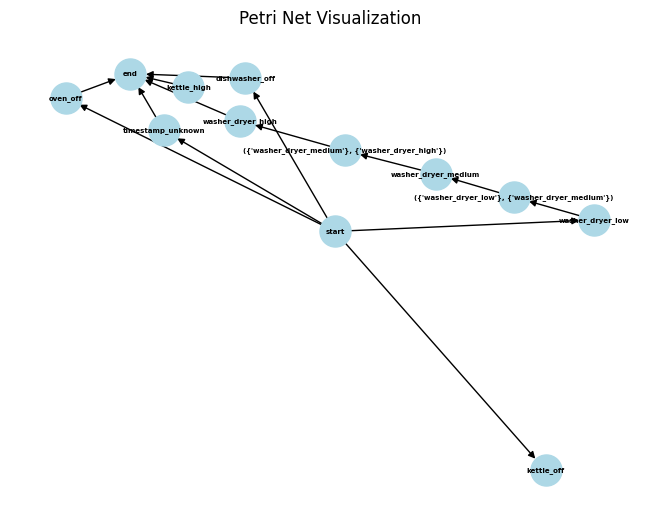

In [9]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

event_log = []

exclude_columns = ['what_hour', 'what_day', 'is_weekend', 'aggregate', 'agg_clustered']

for index, row in df_combined.iterrows():
    timestamp = row['timestamp']
    for device in df_combined.columns:
        if device not in exclude_columns:
            if row[device] == 1:
                state = 'low'
            elif row[device] == 2:
                state = 'medium'
            elif row[device] == 3:
                state = 'high'
            elif row[device] == 4:
                state = 'very_high'
            elif row[device] == 0:
                state = 'off'
            else:
                state = 'unknown'  # Handle unexpected values

            event_log.append({
                'case:concept:name': device,
                'concept:name': f'{device}_{state}',
                'time:timestamp': timestamp
            })


event_log_df = pd.DataFrame(event_log)
event_log_df['time:timestamp'] = pd.to_datetime(event_log_df['time:timestamp'])

event_log_df = dataframe_utils.convert_timestamp_columns_in_df(event_log_df)
event_log = log_converter.apply(event_log_df)

net, initial_marking, final_marking = alpha_miner.apply(event_log) # Alpha Miner

# Petri Net
print("Places:")
for place in net.places:
    print(f"Place: {place.name}")

print("\nTransitions:")
for transition in net.transitions:
    print(f"Transition: {transition.label if transition.label else transition.name}")

print("\nArcs:")
for arc in net.arcs:
    print(f"Arc: {arc.source.name} -> {arc.target.name}")

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node('start')
G.add_node('end')
for transition in net.transitions:
    G.add_node(transition.label if transition.label else transition.name)

for arc in net.arcs:
    G.add_edge(arc.source.name, arc.target.name)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=5, font_weight='bold', arrows=True)
plt.title('Petri Net Visualization')
plt.show()


In [9]:
event_log_df.head(20)

,case:concept:name,concept:name,time:timestamp
0,hairdryer,hairdryer_off,2014-06-30 16:22:00+00:00
1,24_inch_lcd_bedroom,24_inch_lcd_bedroom_off,2014-06-30 16:22:00+00:00
2,kettle,kettle_off,2014-06-30 16:22:00+00:00
3,oven,oven_off,2014-06-30 16:22:00+00:00
4,dishwasher,dishwasher_off,2014-06-30 16:22:00+00:00
5,washer_dryer,washer_dryer_low,2014-06-30 16:22:00+00:00
6,hairdryer,hairdryer_off,2014-06-30 16:22:00+00:00
7,24_inch_lcd_bedroom,24_inch_lcd_bedroom_off,2014-06-30 16:22:00+00:00
8,kettle,kettle_off,2014-06-30 16:22:00+00:00
9,oven,oven_off,2014-06-30 16:22:00+00:00
